In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import model_selection, naive_bayes, svm
from sklearn.model_selection import permutation_test_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn import metrics
import seaborn as sns
import random
from pandas import plotting

In [4]:
random.seed(1)


In [5]:
Part_chro=['13','22','10', '18']
Part_reco=['19','20','02','09']

In [6]:
areas=['FC','FP','FO','FT','TO','TC','TP','PO','PC','CO','FF','CC','PP','TT','OO']

data=pd.read_pickle('data/NEW_wPLI_all_10_1_left_theta.pickle')

In [7]:
#chronic 0
data.insert(0, 'outcome', "0")


# %%
for p in Part_reco:
    data.iloc[np.where(data['ID'] == p)[0],0] = "1"
   

In [8]:
grouped_data=data.groupby('outcome')

plotting.scatter_matrix(data[areas],c=data['outcome'])
fig=plt.gcf()
plt.show()

In [9]:
data_Base=data[(data['Phase'] == 'Base')]
data_Anes=data[(data['Phase'] == 'Anes')]
data_Reco=data[(data['Phase'] == 'Reco')]

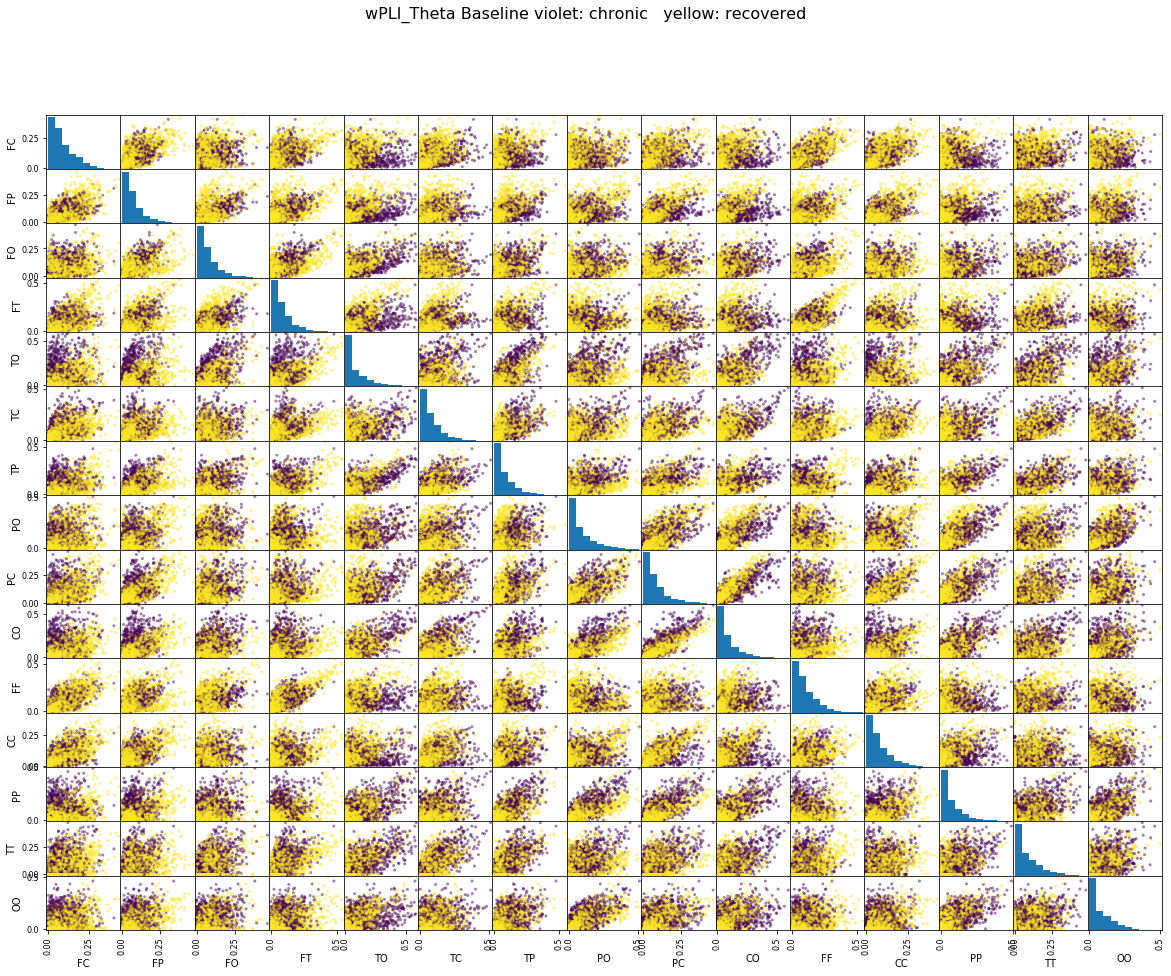

<Figure size 1440x1080 with 0 Axes>

In [10]:
plt.rcParams['figure.figsize'] = [20, 15]
plotting.scatter_matrix(data_Base[areas],c=(data_Base['outcome']=="1"))
fig=plt.gcf()
fig.suptitle('wPLI_Theta Baseline violet: chronic   yellow: recovered', fontsize=16)
plt.show()
plt.savefig('wPLI_Theta_scatter_Base.png',dpi=150)


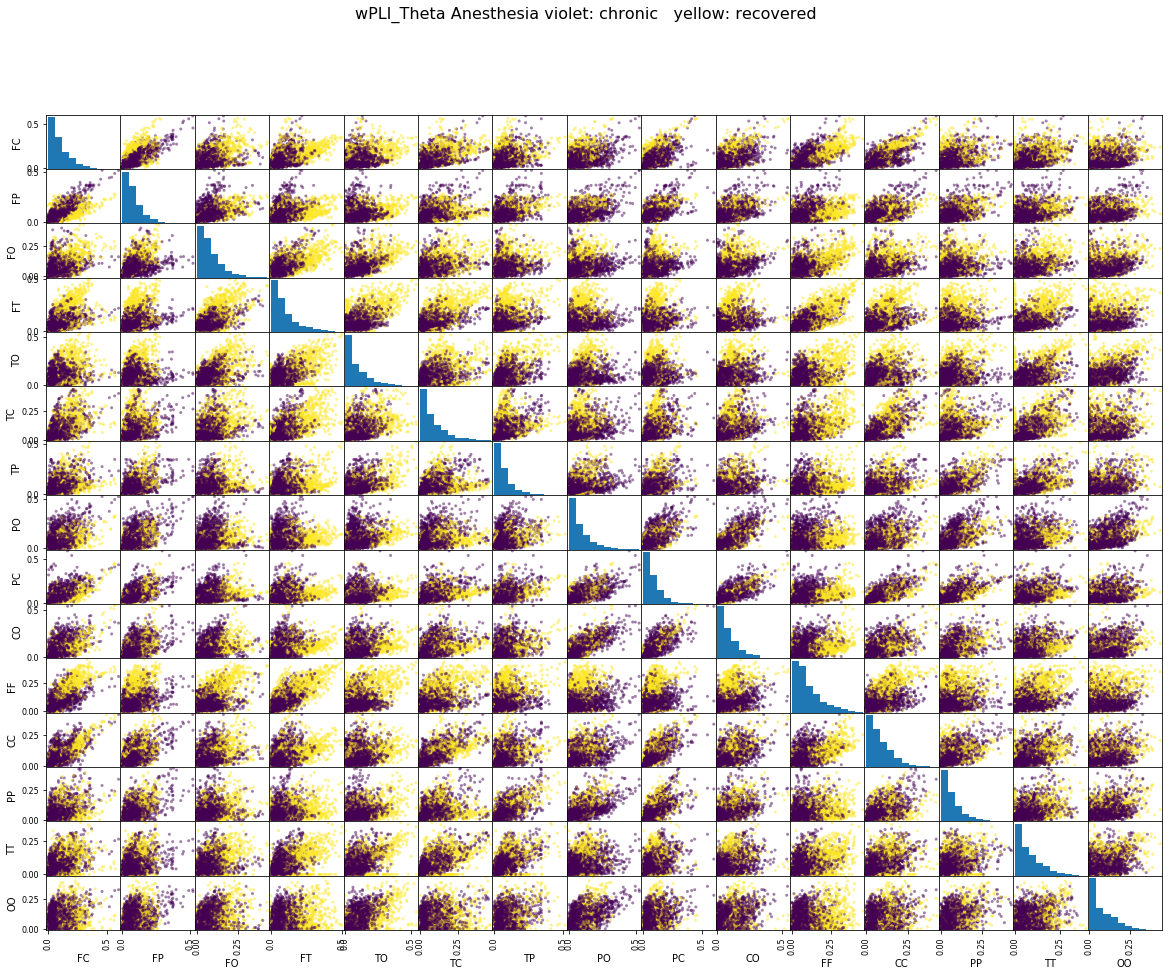

<Figure size 1440x1080 with 0 Axes>

In [11]:
plotting.scatter_matrix(data_Anes[areas],c=(data_Anes['outcome']=="1"))
fig=plt.gcf()
fig.suptitle('wPLI_Theta Anesthesia violet: chronic   yellow: recovered', fontsize=16)
plt.show()
plt.savefig('wPLI_Theta_scatter_Anes.png',dpi=150)

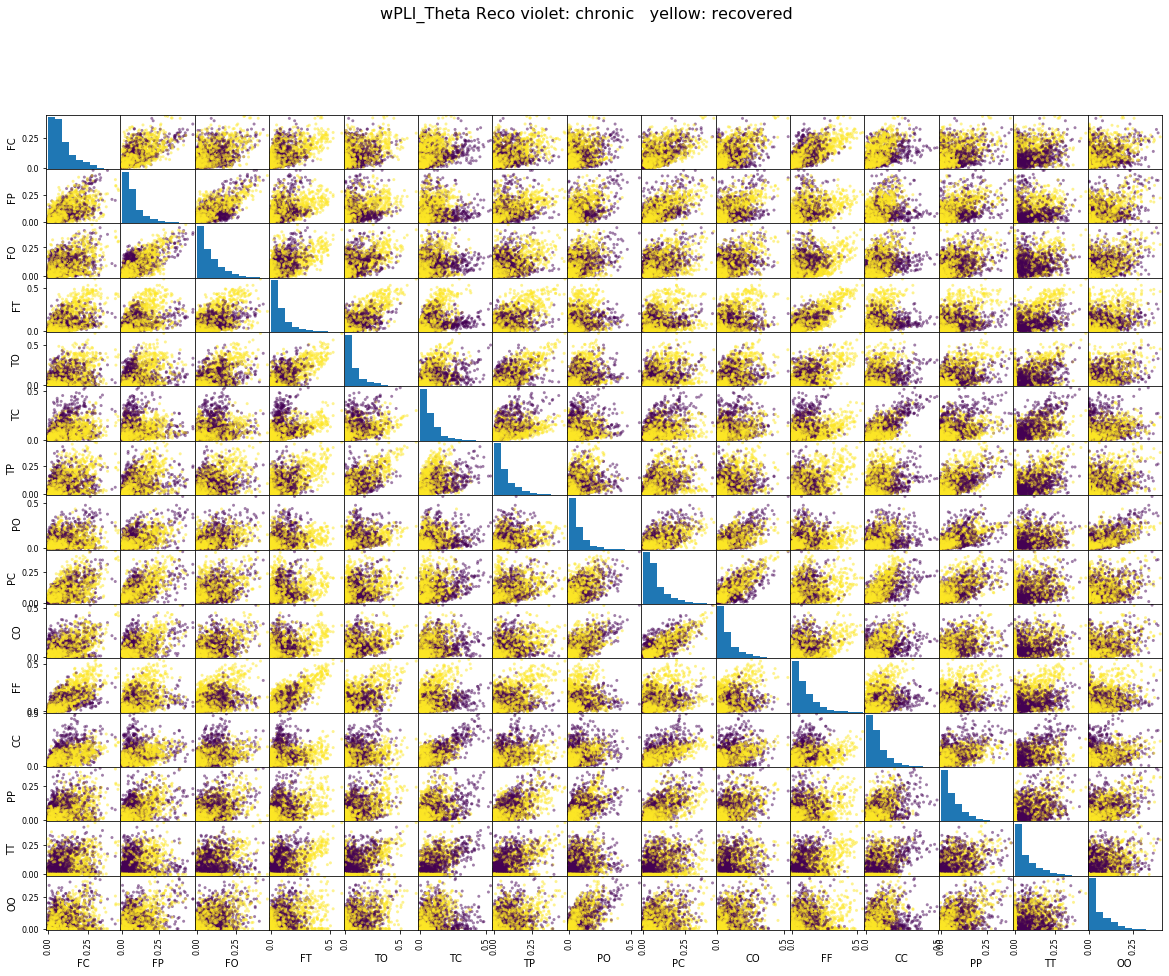

In [12]:
plotting.scatter_matrix(data_Reco[areas],c=(data_Reco['outcome']=="1"))
fig=plt.gcf()
fig.suptitle('wPLI_Theta Reco violet: chronic   yellow: recovered', fontsize=16)
plt.show()



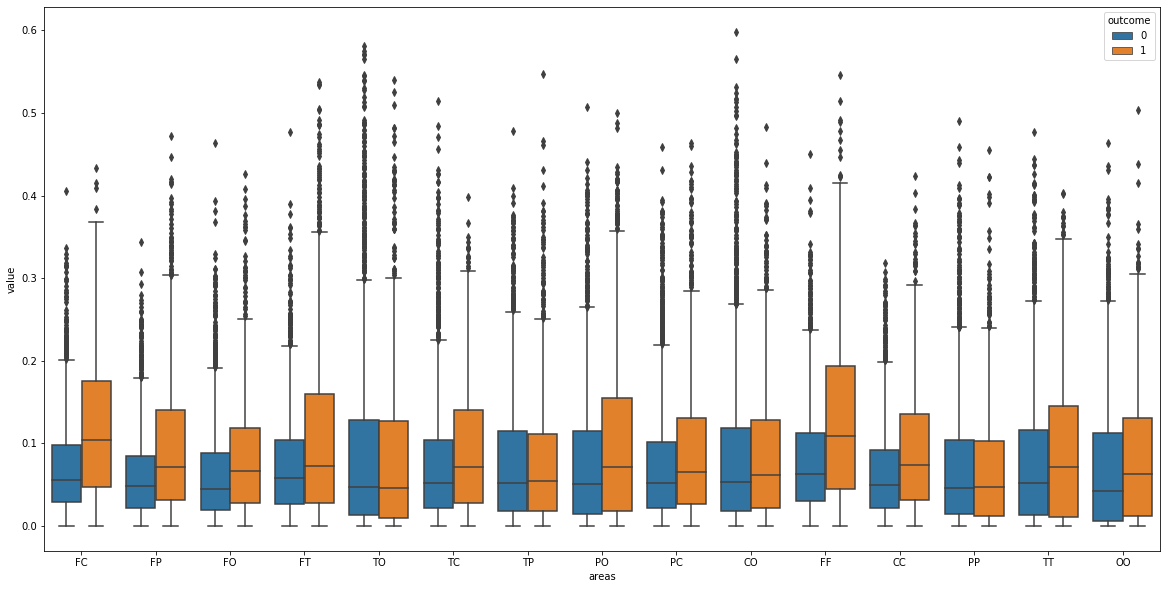

In [13]:
plt.rcParams['figure.figsize'] = [20, 10]
dd=pd.melt(data_Base,id_vars=['outcome'],value_vars=areas,var_name='areas')
sns.boxplot(x='areas',y='value',data=dd,hue='outcome')
plt.savefig('wPLI_Theta_box_Base.png',dpi=150)
#data_Base.groupby('outcome').boxplot(column=areas)


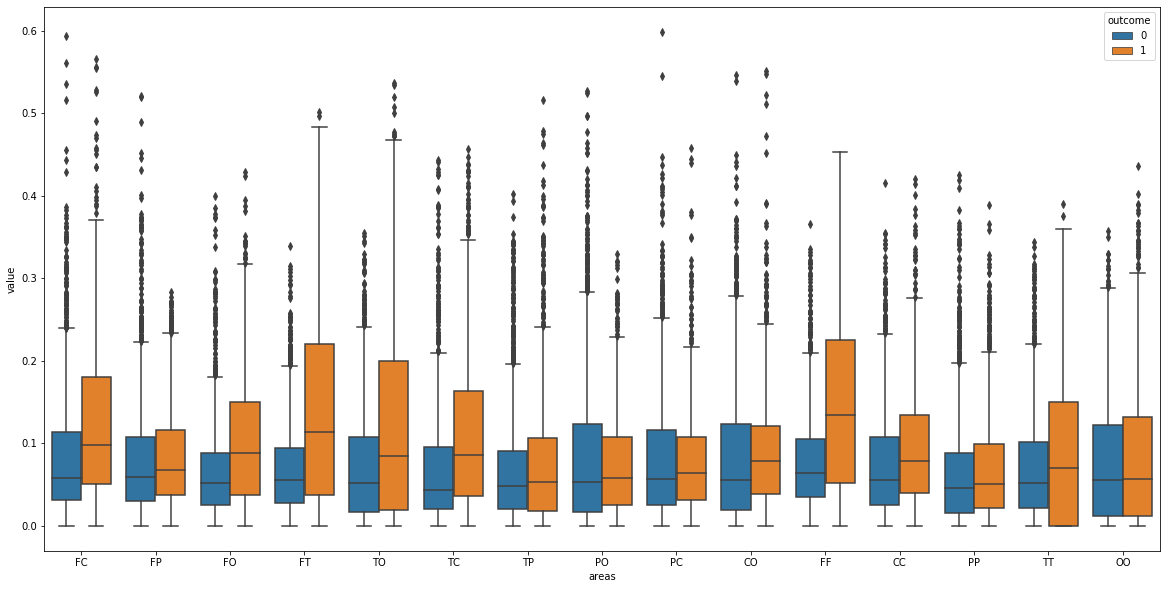

In [14]:
dd=pd.melt(data_Anes,id_vars=['outcome'],value_vars=areas,var_name='areas')
sns.boxplot(x='areas',y='value',data=dd,hue='outcome')
plt.savefig('wPLI_Theta_box_Anes.png',dpi=150)
#data_Anes.groupby('outcome').boxplot(column=areas)


In [15]:
#dd=pd.melt(data_Anes,id_vars=['ID'],value_vars='FF',var_name='areas')
#sns.boxplot(x='areas',y='value',data=dd,hue='ID')

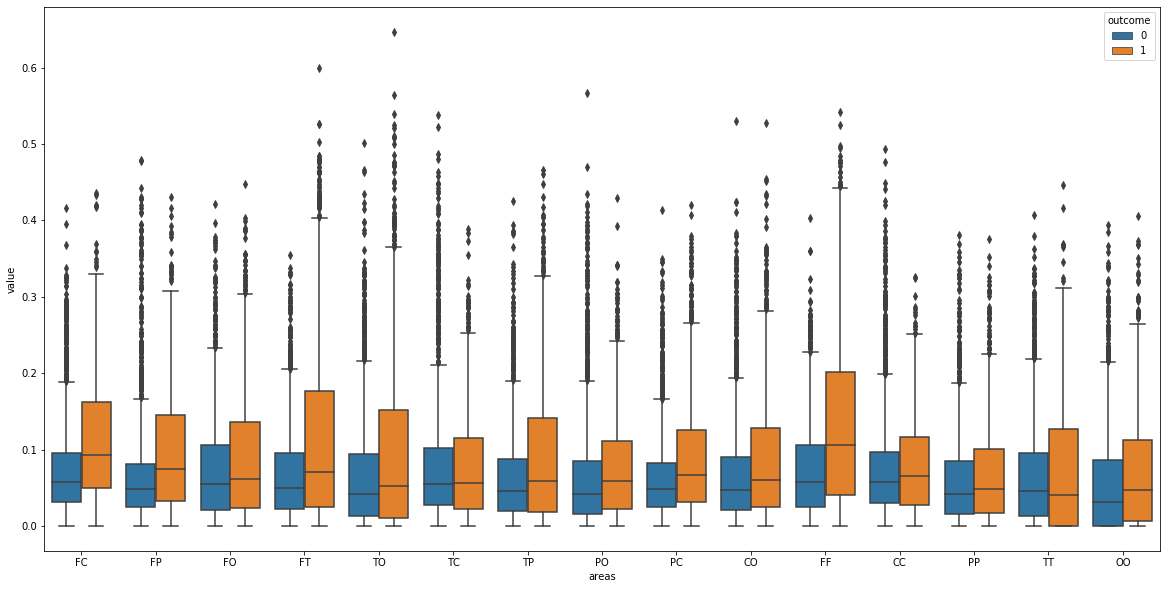

In [16]:
dd=pd.melt(data_Reco,id_vars=['outcome'],value_vars=areas,var_name='areas')
sns.boxplot(x='areas',y='value',data=dd,hue='outcome')
plt.savefig('wPLI_Theta_box_Reco.png',dpi=150)
#data_Reco.groupby('outcome').boxplot(column=areas)


In [17]:
data_Anes

outcome         Name  ID Phase   Time        FC        FP        FO  \
0         0  WSAS10_Anes  10  Anes    0.0  0.005384  0.010811  0.064281   
1         0  WSAS10_Anes  10  Anes    1.0  0.018346  0.054882  0.015587   
2         0  WSAS10_Anes  10  Anes    2.0  0.016856  0.025403  0.035279   
3         0  WSAS10_Anes  10  Anes    3.0  0.021000  0.006901  0.023535   
4         0  WSAS10_Anes  10  Anes    4.0  0.022044  0.089590  0.055997   
..      ...          ...  ..   ...    ...       ...       ...       ...   
186       0  WSAS05_Anes  05  Anes  186.0  0.018604  0.020723  0.019842   
187       0  WSAS05_Anes  05  Anes  187.0  0.050482  0.017833  0.020488   
188       0  WSAS05_Anes  05  Anes  188.0  0.051597  0.028249  0.038799   
189       0  WSAS05_Anes  05  Anes  189.0  0.045399  0.013301  0.072671   
190       0  WSAS05_Anes  05  Anes  190.0  0.032519  0.021726  0.134890   

           FT        TO        TC        TP        PO        PC        CO  \
0    0.061457  0.171787  0.007407  0.035553  0.251552  0.086235  0.157356   
1    0.012739  0.020925  0.013585  0.013158  0.159034  0.043261  0.055781   
2    0.034145  0.058251  0.025889  0.013723  0.068574  0.016443  0.052250   
3    0.021139  0.029110  0.049477  0.021008  0.049616  0.002637  0.033102   
4    0.030673  0.016053  0.028655  0.026249  0.250827  0.073627  0.061976   
..        ...       ...       ...       ...       ...       ...       ...   
186  0.017418  0.064116  0.044692  0.051698  0.054769  0.020754  0.017240   
187  0.012708  0.064608  0.039079  0.062516  0.052886  0.022314  0.015531   
188  0.020960  0.087700  0.031313  0.064479  0.082495  0.022846  0.021942   
189  0.010245  0.054276  0.033725  0.040555  0.045689  0.028276  0.018074   
190  0.002750  0.116072  0.028695  0.063666  0.073708  0.028092  0.050906   

           FF        CC        PP        TT        OO  
0    0.076351  0.032214  0.038849  0.056307  0.080777  
1    0.069732  0.020305  0.027920  0.014503  0.041663  
2    0.065084  0.000000  0.000000  0.025001  0.000000  
3    0.087581  0.002125  0.000000  0.020949  0.015526  
4    0.101632  0.025044  0.078455  0.011719  0.216417  
..        ...       ...       ...       ...       ...  
186  0.044045  0.018217  0.083323  0.074178  0.095521  
187  0.103201  0.043161  0.065172  0.078233  0.088582  
188  0.099813  0.033944  0.090704  0.061494  0.082601  
189  0.088032  0.039041  0.107370  0.077932  0.088082  
190  0.097839  0.022621  0.043685  0.062327  0.139440  

[3101 rows x 20 columns]

In [18]:
from scipy.stats import ttest_ind

p_diff_Anes=[]
cat1 = data_Anes[(data_Anes['ID'] == '13') | (data_Anes['ID'] == '22') | (data_Anes['ID'] == '10') | (data_Anes['ID'] == '18')]
cat2 = data_Anes[(data_Anes['ID'] == '19') | (data_Anes['ID'] == '20') | (data_Anes['ID'] == '02') | (data_Anes['ID'] == '09')]
#cat2 = data_Anes[data_Anes['outcome']==1]

for a in areas:
    p_diff_Anes.append([a,ttest_ind(cat1[a], cat2[a],equal_var=False)])
    

In [19]:
p_diff_Anes

[['FC',
  Ttest_indResult(statistic=-9.386384701303099, pvalue=1.4682640452021604e-20)],
 ['FP',
  Ttest_indResult(statistic=-1.4069937610811813, pvalue=0.15956515335171226)],
 ['FO',
  Ttest_indResult(statistic=-14.569162184869533, pvalue=9.638512746164392e-46)],
 ['FT',
  Ttest_indResult(statistic=-18.796119201330303, pvalue=1.7630417037950732e-71)],
 ['TO',
  Ttest_indResult(statistic=-11.053306081598416, pvalue=1.4466116152122688e-27)],
 ['TC',
  Ttest_indResult(statistic=-10.091509648136508, pvalue=1.9369363054887474e-23)],
 ['TP',
  Ttest_indResult(statistic=-2.043656418831349, pvalue=0.04110244795320892)],
 ['PO',
  Ttest_indResult(statistic=3.9154421255310505, pvalue=9.331879638353952e-05)],
 ['PC',
  Ttest_indResult(statistic=4.467401669720652, pvalue=8.329250881353902e-06)],
 ['CO',
  Ttest_indResult(statistic=-0.6983452607458406, pvalue=0.48503316422298226)],
 ['FF',
  Ttest_indResult(statistic=-21.85591165330699, pvalue=3.645172377240248e-93)],
 ['CC',
  Ttest_indResult(sta